# STUDY ON MOTOR VEHICLE COLLISION DATA IN NEW YORK

## Brief summery of collision data used

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import warnings
# from scipy import sstats

In [2]:
df = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv')
df['DATE'] = pd.to_datetime(df['DATE'], format="%m/%d/%Y")
df = df.sort_values('DATE')
df['WEEK_DAY'] = df['weekday'] = pd.DatetimeIndex(df.DATE).weekday_name
df['HOUR'] = df.TIME.map(lambda x:int(x.split(':')[0]))
df = df[df.DATE<=pd.Timestamp('2017-01-31')].copy()

## General information

We would like to propose a question and answer it by handling data given by NYPD. At first, general information about our data is shown to let you know what kind of data we have.

In [3]:
df.head(n=3)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,WEEK_DAY,weekday,HOUR
974077,2012-07-01,9:15,STATEN ISLAND,10310.0,40.634748,-74.112253,"(40.6347476, -74.1122528)",CASTLETON AVENUE,BEMENT AVENUE,NaN,...,NaN,284646,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,Sunday,Sunday,9
838637,2012-07-01,5:48,BRONX,10466.0,40.888588,-73.849879,"(40.8885878, -73.8498787)",PAULDING AVENUE,EAST 230 STREET,NaN,...,NaN,94866,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,Sunday,Sunday,5
838636,2012-07-01,5:40,QUEENS,11368.0,40.753750,-73.869803,"(40.7537502, -73.869803)",35 AVENUE,98 STREET,NaN,...,NaN,279636,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,Sunday,Sunday,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972024 entries, 974077 to 454511
Data columns (total 32 columns):
DATE                             972024 non-null datetime64[ns]
TIME                             972024 non-null object
BOROUGH                          718029 non-null object
ZIP CODE                         717933 non-null float64
LATITUDE                         769072 non-null float64
LONGITUDE                        769072 non-null float64
LOCATION                         769072 non-null object
ON STREET NAME                   790481 non-null object
CROSS STREET NAME                763904 non-null object
OFF STREET NAME                  69523 non-null object
NUMBER OF PERSONS INJURED        972024 non-null int64
NUMBER OF PERSONS KILLED         972024 non-null int64
NUMBER OF PEDESTRIANS INJURED    972024 non-null int64
NUMBER OF PEDESTRIANS KILLED     972024 non-null int64
NUMBER OF CYCLIST INJURED        972024 non-null int64
NUMBER OF CYCLIST KILLED         972024

In [5]:
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
df.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY,HOUR
count,717933.000000,769072.000000,769072.000000,972024.000000,972024.000000,972024.000000,972024.000000,972024.000000,972024.000000,972024.000000,972024.000000,9.720240e+05,972024.000000
mean,10807.899137,40.722984,-73.923266,0.255388,0.001223,0.053982,0.000689,0.020937,0.000076,0.191247,0.000461,2.023866e+06,13.391648
std,567.023908,0.077365,0.086031,0.656270,0.036761,0.246769,0.026518,0.151156,0.008725,0.663952,0.024084,1.515115e+06,5.554113
min,10000.000000,40.498949,-74.254532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000e+01,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.447958e+05,10.000000
50%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.107952e+06,14.000000
75%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.365138e+06,18.000000
max,11697.000000,40.912869,-73.700597,43.000000,5.000000,15.000000,2.000000,6.000000,1.000000,43.000000,5.000000,3.611009e+06,23.000000


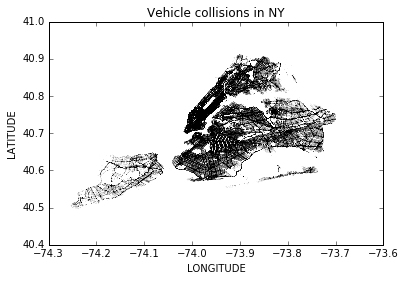

In [6]:
# all collisions plot
df.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', s=0.0001, title='Vehicle collisions in NY').get_figure().savefig('collisions.png')

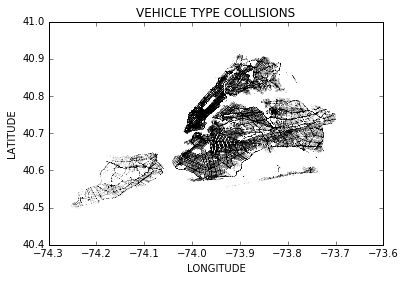

In [7]:
# Only passenger vehicle type collisions plot
df[(df['VEHICLE TYPE CODE 1'].isin(['PASSENGER VEHICLE'])) | (df['VEHICLE TYPE CODE 2'].isin(['PASSENGER VEHICLE']))].plot(kind='scatter', x='LONGITUDE', y='LATITUDE', color = 'Red', s=0.0001, title='VEHICLE TYPE COLLISIONS')

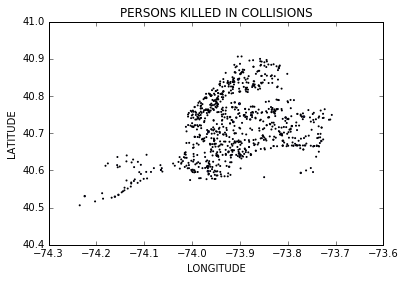

In [8]:
# Number of persons killed is a size
df.plot.scatter(x='LONGITUDE', y='LATITUDE', s=df['NUMBER OF PERSONS KILLED'], title='PERSONS KILLED IN COLLISIONS')

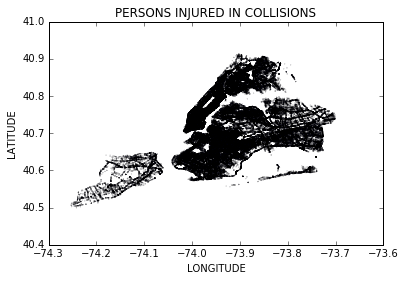

In [9]:
# Number of persons injured is a size
df.plot.scatter(x='LONGITUDE', y='LATITUDE', s=df['NUMBER OF PERSONS INJURED']*0.01, title='PERSONS INJURED IN COLLISIONS')

## What type of collisions happened the most? - Passenger vehicle

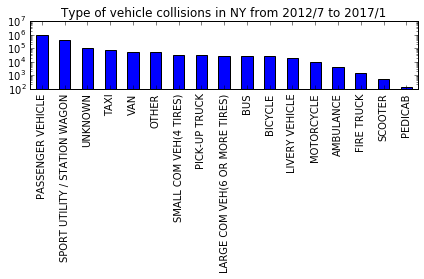

In [10]:
vehiclecode1 = df['VEHICLE TYPE CODE 1'].value_counts()
vehiclecode2 = df['VEHICLE TYPE CODE 2'].value_counts()
vehiclecode3 = df['VEHICLE TYPE CODE 3'].value_counts()
vehiclecode = vehiclecode1 + vehiclecode2 + vehiclecode3
vehiclecode = vehiclecode.sort_values(ascending=False)
ax = vehiclecode.plot(kind='bar', title='Type of vehicle collisions in NY from 2012/7 to 2017/1', logy=True)
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('collisionsType.png')

## On which street did collision happened the most? - Broadway 

It may be because many people and cars go around on Broadway.

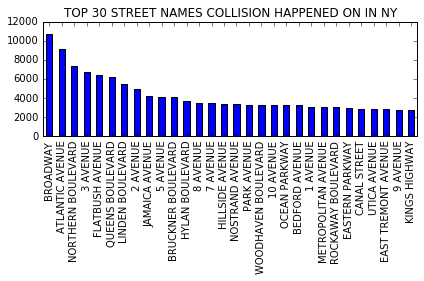

In [11]:
ax = df['ON STREET NAME'].value_counts().sort_values(ascending=False)[:30].plot(kind='bar', title='TOP 30 STREET NAMES COLLISION HAPPENED ON IN NY')
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('collisionsStreet.png')

Also, some plots are done below.

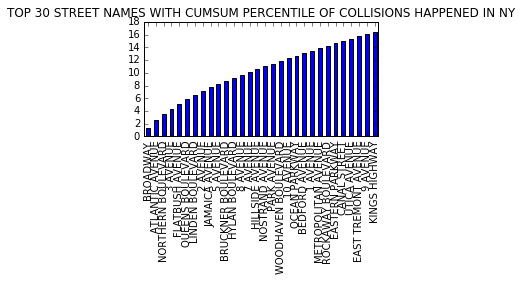

In [12]:
df_street = pd.DataFrame(df['ON STREET NAME'].value_counts().sort_values(ascending=False))
df_street['ON STREET NAME CUMSUM'] = df_street['ON STREET NAME'].cumsum()
df_street['ON STREET NAME CUMSUM PERC'] = 100*df_street['ON STREET NAME CUMSUM']/df_street['ON STREET NAME'].sum()
ax = df_street['ON STREET NAME CUMSUM PERC'][:30].plot(kind='bar', title='TOP 30 STREET NAMES WITH CUMSUM PERCENTILE OF COLLISIONS HAPPENED IN NY')
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('collisionsStreetCum.png')

In [13]:
# cummulative percentage of all streets
# ax_cumstreet = df_street['ON STREET NAME CUMSUM PERC'].plot(kind='bar', title='TOP 30 STREET NAMES WITH CUMSUM PERCENTILE OF COLLISIONS HAPPENED IN NY')
# ax_cumstreet.tick_params(labelbottom='off')
# ax_cumstreet

# On how many percentages of streets does a half of collisions happenes? - 3% of streets.

In [14]:
allcnt=len(df_street)
print('The number of all collisions over streets was {}'.format(allcnt))

The number of all collisions over streets was 9072


Pareto principle is effective here.
The number of collisions on 3% of streets is more than 50% of that on all streets in NY.
The number of collisions on 10% of streets is roughly 80% of that on all streets in NY.

In [15]:
df_street.iloc[[int(allcnt*0.03)]]

,ON STREET NAME,ON STREET NAME CUMSUM,ON STREET NAME CUMSUM PERC
168 STREET,579,403249,51.013117


In [16]:
df_street.iloc[[int(allcnt*0.1)]]

,ON STREET NAME,ON STREET NAME CUMSUM,ON STREET NAME CUMSUM PERC
100 STREET,198,618527,78.246915


## Is a collision seasonal? - Yes, the most in Summer, the least in Winter.

According to the graph, there is no difference in the number of collisions across seasons.

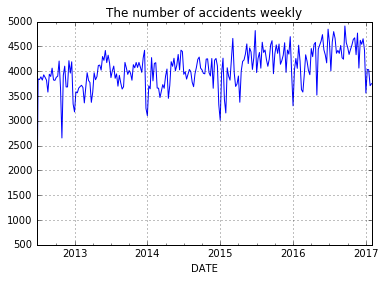

In [17]:
df2 = df[['DATE']].copy()
df2 = df2.groupby('DATE').size()
df2 = df2.resample('W').sum()
df2[df2.index<pd.Timestamp('2017-02-01')].plot(grid=True, title="The number of accidents weekly").get_figure().savefig('collisionsWeekly.png')

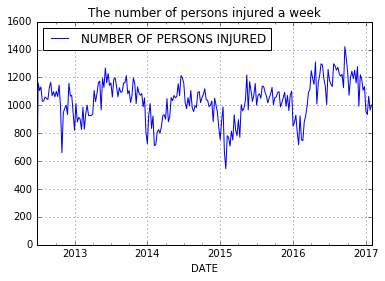

In [18]:
df2 = df[['DATE', 'NUMBER OF PERSONS INJURED']].copy()
df2 = df2.groupby('DATE').sum()
df2 = df2.resample('W').sum()
df2[df2.index < pd.Timestamp('2017-01-31')].plot(grid=True, title="The number of persons injured a week").get_figure().savefig('collisionsInjuredWeekly.png')

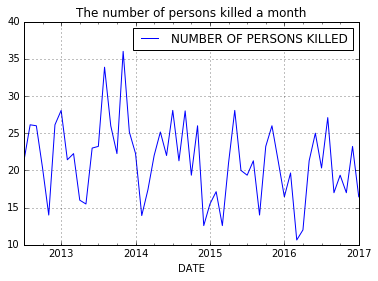

In [19]:
df3 = df[['DATE', 'NUMBER OF PERSONS KILLED']]
df3 = df3.groupby('DATE').sum()
df3 = df3.resample('M').sum()
for index, row in df3.iterrows():
    # let each month have 30 days
    df3.ix[index, 'NUMBER OF PERSONS KILLED'] = row['NUMBER OF PERSONS KILLED']*30/index.day
df3.plot(grid=True, title="The number of persons killed a month").get_figure().savefig('collisionsKilled.png')

Above graphs might make us think a collision happens in winter more often.

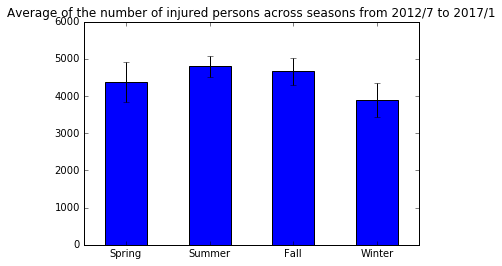

In [20]:
df2 = df[['DATE', 'NUMBER OF PERSONS INJURED']].copy()
df2 = df2.groupby('DATE').sum()
df2 = df2.resample('M').sum()
df2['M'] = pd.DatetimeIndex(df2.index).month
for index, row in df2.iterrows():
    # let each month have 30 days
    df2.ix[index, 'NUMBER OF PERSONS INJURED'] = row['NUMBER OF PERSONS INJURED']*30/index.day
df_injured_season = pd.DataFrame({
    'Spring': df2[(3<=df2.M) & (df2.M<=5)]['NUMBER OF PERSONS INJURED'],
    'Summer': df2[(6<=df2.M) & (df2.M<=8)]['NUMBER OF PERSONS INJURED'],
    'Fall':   df2[(9<=df2.M) & (df2.M<=11)]['NUMBER OF PERSONS INJURED'],
    'Winter': df2[(12==df2.M) | (df2.M<=2)]['NUMBER OF PERSONS INJURED']
})
df_injured_season = df_injured_season[['Spring', 'Summer', 'Fall', 'Winter']]
fig, ax = plt.subplots()
df_injured_season.mean().plot.bar(yerr=df_injured_season.std(), ax=ax, rot=0, title='Average of the number of injured persons across seasons from 2012/7 to 2017/1').get_figure().savefig('collisionsInjuredSeason.png')

Stundet's t test was done. difference is statistically significant between Summer and Winter at P=

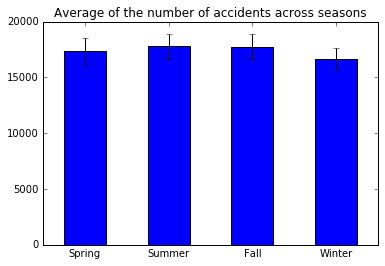

In [21]:
# copy Date column, then count each day to count cases of collisions over days
df4 = df[['DATE']].copy()
df4 = pd.DataFrame(df4.groupby('DATE').size(), columns=['NUM'])
df4 = df4.resample('M').sum()
df4['M'] = pd.DatetimeIndex(df4.index).month
for index, row in df4.iterrows():
    # adjust each month day to 30 days.
    df4.ix[index, 'NUM'] = row.NUM*30/index.day

df_season = pd.DataFrame({
    'Spring': df4[(3<=df4.M) & (df4.M<=5)].NUM,
    'Summer': df4[(6<=df4.M) & (df4.M<=8)].NUM,
    'Fall':   df4[(9<=df4.M) & (df4.M<=11)].NUM,
    'Winter': df4[(12==df4.M) | (df4.M<=2)].NUM
})
df_season = df_season[['Spring', 'Summer', 'Fall', 'Winter']]
fig, ax = plt.subplots()
df_season.mean().plot.bar(yerr=df_season.std(), ax=ax, rot=0, title='Average of the number of accidents across seasons').get_figure().savefig('collisionsSeason.png')

Stundet's t test was done. difference is statistically significant between Summer and Winter at P=

 Let us go on studying. See monthly bar chart:

## In which month collisions happen the most? - In June.

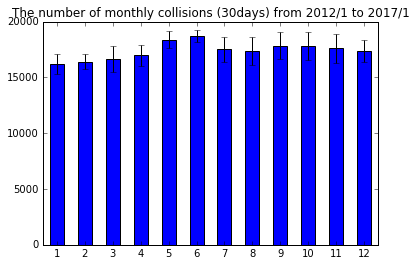

In [22]:
# copy Date column, then count each day to count cases of collisions over days
df5 = df[['DATE']].copy()
df5 = df5.groupby('DATE').size()
df5 = df5.resample('M').sum()
for i in range(len(df5)):
    df5[i] = df5[i]*30.0/df5.index[i].day
df5m = df5.groupby(df5.index.map(lambda x: x.month)).mean()
df5d = df5.groupby(df5.index.map(lambda x: x.month)).std()
df5m.plot(kind='bar', yerr=df5d, title='The number of monthly collisions (30days) from 2012/1 to 2017/1', rot=0).get_figure().savefig('collisionsMonthly.png')

## On which weekday a collision happens the most? - Friday.

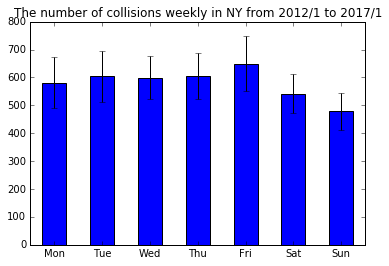

In [23]:
df2 = df[['DATE']].copy()
df2 = pd.DataFrame(df2.groupby('DATE').size(), columns=['collisionsDaily'])
df2['weekday'] = pd.DatetimeIndex(df2.index).weekday_name
d_week ={}
for w in set(df2.weekday):
    d_week[w[:3]] = df2[df2.weekday==w]['collisionsDaily']
df_weekday = pd.DataFrame(d_week, columns=['Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax = df_weekday.mean().plot.bar(yerr=df_weekday.std(), title="The number of collisions weekly in NY from 2012/1 to 2017/1", rot=0).get_figure().savefig('collisionsWeeklyBar.png')

# At which time a collision happens the most? - 4pm

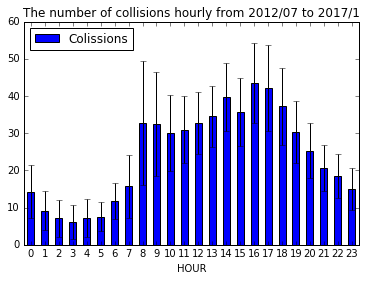

In [24]:
# copy Date column, then count each day to count cases of collisions over days
df_hour = df[['DATE', 'HOUR']].copy()
df_hour2 = pd.DataFrame(df_hour.groupby(['DATE', 'HOUR']).size(), columns=['Colissions'])
df_hour3 = df_hour2.reset_index().groupby('HOUR')
df_hour3.mean().plot.bar(yerr=df_hour3.std(), rot=0, title='The number of collisions hourly from 2012/07 to 2017/1').get_figure().savefig('collisionsHourly.png')
# df_hour.value_counts().sort_index().plot.bar(rot=0)

## Is weather related to collisions? - No.

Weather data had been taken at Central Park, New York. So, collision data only in Manhattan is used below. As we see below, precipitatoin, snow, temperature have no effect on motor vehicle collisions.

In [25]:
weather = pd.read_csv('NY305801_6816.csv', header=1)
weather.columns = weather.columns.str.strip()
weather['DATE'] = weather.apply(lambda x: pd.Timestamp('{}-{}-{}'.format(x.Year, x.Month, x.Day)), axis=1)
weather = weather.set_index('DATE')
weather[['PRCP (in)', 'SNOW (in)', 'TAVE (F)', 'TMAX (F)']].tail()

,PRCP (in),SNOW (in),TAVE (F),TMAX (F)
DATE,,,,
2014-12-27,0.0,0.0,50,55
2014-12-28,0.1,0.0,49,54
2014-12-29,0.0,0.0,39,44
2014-12-30,0.0,0.0,31,34
2014-12-31,0.0,0.0,30,32


In [26]:
daterange = pd.date_range(max(df.DATE.min(), weather.index.min()), min(df.DATE.max(), weather.index.max()))
dfw = pd.DataFrame(
    {'NUM':df[(df.DATE.isin(daterange)) & (df.BOROUGH.isin(['MANHATTAN']))].groupby('DATE').size()},
    index = daterange
)

In [27]:
dfw[['PRCP(in)', 'SNOW(in)', 'TAVE(F)', 'TMAX(F)']] =  weather[weather.index.isin(daterange)][['PRCP (in)', 'SNOW (in)', 'TAVE (F)', 'TMAX (F)']]

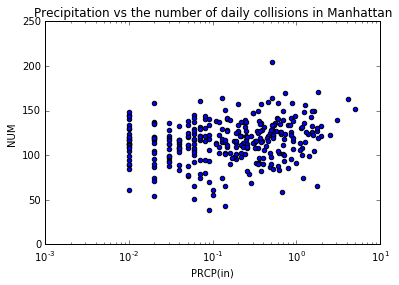

In [28]:
dfw[dfw['PRCP(in)']>0].plot(kind='scatter', x='PRCP(in)', y='NUM', logx=True, title="Precipitation vs the number of daily collisions in Manhattan").get_figure().savefig('collisionsPrcp.png')

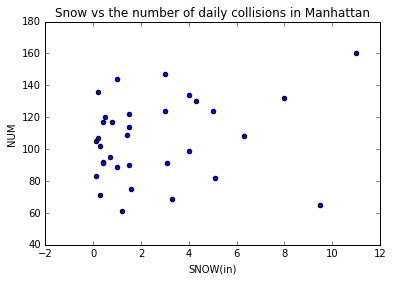

In [29]:
dfw[dfw['SNOW(in)']>0].plot(kind='scatter', x='SNOW(in)', y='NUM', title="Snow vs the number of daily collisions in Manhattan").get_figure().savefig('collisionsSnow.png')

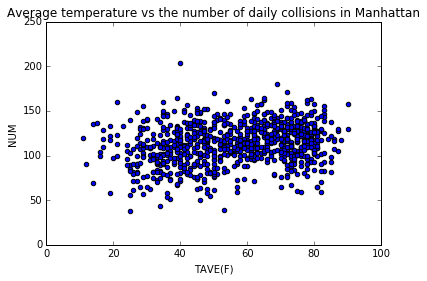

In [30]:
dfw.plot(kind='scatter', x='TAVE(F)', y='NUM', title="Average temperature vs the number of daily collisions in Manhattan").get_figure().savefig('collisionsTave.png')